<a href="https://colab.research.google.com/github/aman5898/Bit-Mesra-Data-Mining/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/GauravChoudhay/K_MEANS/main/php50jXam.csv')

In [3]:
df.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [4]:
df

,V1,V2,V3,V4,Class
0,3.62160,8.66610,-2.8073,-0.44699,1
1,4.54590,8.16740,-2.4586,-1.46210,1
2,3.86600,-2.63830,1.9242,0.10645,1
3,3.45660,9.52280,-4.0112,-3.59440,1
4,0.32924,-4.45520,4.5718,-0.98880,1
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,2
1368,-1.38870,-4.87730,6.4774,0.34179,2
1369,-3.75030,-13.45860,17.5932,-2.77710,2
1370,-3.56370,-8.38270,12.3930,-1.28230,2


In [5]:
df.shape

(1372, 5)

In [6]:
df.describe()

,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,1.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,2.000000
max,6.824800,12.951600,17.927400,2.449500,2.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
 2   V3      1372 non-null   float64
 3   V4      1372 non-null   float64
 4   Class   1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [8]:
import matplotlib.pyplot as plt

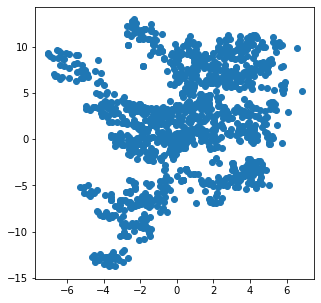

In [10]:
plt.figure(figsize=[5,5])
plt.scatter(df.V1,df.V2)
plt.show()

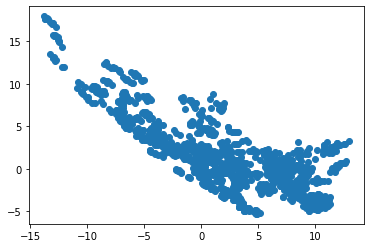

In [11]:
plt.scatter(df.V2,df.V3)
plt.show()

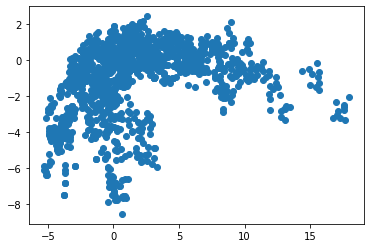

In [12]:
plt.scatter(df.V3,df.V4)
plt.show()

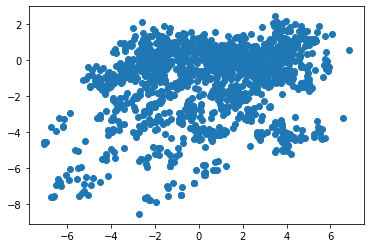

In [13]:
plt.scatter(df.V1,df.V4)
plt.show()